
<img src="img/viu_logo.png" width="200">

## 01MIAR - Pandas

![logo](img/python_logo.png)

*Ivan Fuertes*

*Benjamin Arroquia Cuadros*

# Pandas
- Librería (de facto estándar) para estructurar datos tabulares
- Multivariable (string, int, float, bool...)
- Dos clases:
  - Series (1 dimensión)
  - DataFrames (2+ dimensiones)

In [2]:
# librería externa
import pandas as pd
import numpy as np
# from pandas import Series, DataFrame

# Series
- Datos unidimensionales (similar a NumPy)
- Elementos + índices modificables
- Índices semánticos y posicionales

In [3]:
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France'])
print(type(countries))
print(countries)

<class 'pandas.core.series.Series'>
0        Spain
1      Andorra
2    Gibraltar
3     Portugal
4       France
dtype: object


In [3]:
# especificando el índice
countries = pd.Series(['Spain','Andorra','Gibraltar','Portugal','France'],
                       index=range(10,60,10))
print(countries)

10        Spain
20      Andorra
30    Gibraltar
40     Portugal
50       France
dtype: object


In [7]:
football_cities = pd.Series(list(range(0, 4)), 
                            index=['a','b','c','d'])
print(football_cities)

football_cities_np = pd.Series(np.arange(4), 
                            index=['a','b','c','d'])
print(football_cities_np)

a    0
b    1
c    2
d    3
dtype: int64
a    0
b    1
c    2
d    3
dtype: int32


In [9]:
# los índices pueden ser de más tipos
# los índices semánticos pueden repetirse
football_cities = pd.Series(['Barcelona','Madrid','Valencia','Sevilla'], 
                            index=['a','b','c','d'])
print(football_cities)

a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
dtype: object


In [12]:
# Atributos
football_cities.name = 'Ciudades con dos equipos en primera' # nombrar la Serie
football_cities.index.name = 'asdasdasd' # Describir los índices
print(football_cities)

asdasdasd
a    Barcelona
b       Madrid
c     Valencia
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


In [16]:
# Acceso a los índices
football_cities.index[:], football_cities.name

(Index(['a', 'b', 'c'], dtype='object', name='asdasdasd'),
 'Ciudades con dos equipos en primera')

In [17]:
# acceso similar a NumPy o listas, según posición
print(football_cities[2])

# acceso a través del índice semántico
print(football_cities['c'])

print(football_cities['c'] == football_cities[2])

Valencia
Valencia
True


# Tratamiento similar a ndarray

In [18]:
# múltiple recolección de elementos
print(football_cities[ ['a','c'] ])
print(football_cities[ [0, 3] ])

asdasdasd
a    Barcelona
c     Valencia
Name: Ciudades con dos equipos en primera, dtype: object
asdasdasd
a    Barcelona
d      Sevilla
Name: Ciudades con dos equipos en primera, dtype: object


In [19]:
# slicing
print(football_cities[:'c']) # incluye ambos extremos con el indice semantico
print(football_cities[:2])

asdasdasd
a    Barcelona
b       Madrid
c     Valencia
Name: Ciudades con dos equipos en primera, dtype: object
asdasdasd
a    Barcelona
b       Madrid
Name: Ciudades con dos equipos en primera, dtype: object


In [20]:
#cast a list
lista = list(football_cities[:'c'])
print(lista)
print(type(lista))

['Barcelona', 'Madrid', 'Valencia']
<class 'list'>


In [32]:
type(football_cities[:'c'])

pandas.core.series.Series

In [33]:
#cast a ndarray
import numpy as np

cities = np.array(football_cities[:'c'])
print(cities)
print(type(cities))

['Barcelona' 'Madrid' 'Valencia']
<class 'numpy.ndarray'>


In [21]:
# uso de masks para seleccionar
fibonacci = pd.Series([0, 1, 1, 2, 3, 5, 8, 13, 21])

mask = fibonacci > 10
print(mask)
print(fibonacci[mask])

dst = pd.Series([13,21])
print(dst)

fb = fibonacci[mask]
fb.reset_index(drop=True, inplace=True)
print(fb)

# Comparación de dos series tienen los mimos elementos
dst.equals(fb)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
dtype: bool
7    13
8    21
dtype: int64
0    13
1    21
dtype: int64
0    13
1    21
dtype: int64


True

In [24]:
# aplicar funciones de numpy a la serie
print(np.sum(fibonacci))
print(fibonacci.sum())

54
54


In [25]:
#filtrado con np.where
distances = pd.Series([12.1,np.nan,12.8,76.9,6.1,7.2])

valid_distances = np.where(pd.notnull(distances),distances,distances.mean())

print(valid_distances)
print(type(valid_distances))

[12.1  23.02 12.8  76.9   6.1   7.2 ]
<class 'numpy.ndarray'>


### Iteración

In [58]:
# iterar sobre elementos
for value in fibonacci:
    print('Value: ' + str(value))

# iterar sobre indices
for index in fibonacci.index:
    print('Index: ' + str(index))

Value: 0
Value: 1
Value: 1
Value: 2
Value: 3
Value: 5
Value: 8
Value: 13
Value: 21
Index: 0
Index: 1
Index: 2
Index: 3
Index: 4
Index: 5
Index: 6
Index: 7
Index: 8


In [59]:
# iterar sobre elementos e índices al mismo tiempo
for index, value in fibonacci.items():
    print('Index: ' + str(index) + '  Value: ' + str(value))

Index: 0  Value: 0
Index: 1  Value: 1
Index: 2  Value: 1
Index: 3  Value: 2
Index: 4  Value: 3
Index: 5  Value: 5
Index: 6  Value: 8
Index: 7  Value: 13
Index: 8  Value: 21


In [60]:
for index, value in zip(fibonacci.index, fibonacci):
    print('Index: ' + str(index) + '  Value: ' + str(value))  

Index: 0  Value: 0
Index: 1  Value: 1
Index: 2  Value: 1
Index: 3  Value: 2
Index: 4  Value: 3
Index: 5  Value: 5
Index: 6  Value: 8
Index: 7  Value: 13
Index: 8  Value: 21


## Series como diccionarios
- Interpretar el índice como clave
- Acepta operaciones para diccionarios

In [27]:
# crear una serie a partir de un diccionario
serie = pd.Series( { 'Carlos' : 100, 'Marcos': 98} )

print(serie.index)
print(serie.values)

print(serie)
print(type(serie))

Index(['Carlos', 'Marcos'], dtype='object')
[100  98]
Carlos    100
Marcos     98
dtype: int64
<class 'pandas.core.series.Series'>


In [28]:
# añade y elimina elementos a través de índices
serie['Pedro'] = 12
del serie['Marcos']
print(serie)

Carlos    100
Pedro      12
dtype: int64


In [30]:
# query una serie
#print(serie['Marcos'])

if 'Marcos' in serie:
    print(serie['Marcos'])
    
print(serie)

Carlos    100
Pedro      12
dtype: int64


## Operaciones entre series

In [39]:
# suma de dos series
# suma de valores con el mismo índice (NaN si no aparece en ambas)
serie1 = pd.Series([10, 20, 30, 40], index=range(4))
serie2 = pd.Series([10, np.nan, 20, 30], index=range(0,4))
print(serie1)
print(serie2)
print(serie1+serie2)
# No vale en comparaciones

#TODO: 
serie1.equals(serie2)

0    10
1    20
2    30
3    40
dtype: int64
0    10.0
1     NaN
2    20.0
3    30.0
dtype: float64
0    20.0
1     NaN
2    50.0
3    70.0
dtype: float64


False

In [40]:
# resta de series (similar a la suma)
print(serie1 - serie2)

0     0.0
1     NaN
2    10.0
3    10.0
dtype: float64


In [41]:
# operaciones de pre-filtrado
result = serie1 - serie2
result[pd.isnull(result)] = 0 # mask con isnull()
print(result)

0     0.0
1     0.0
2    10.0
3    10.0
dtype: float64


###  Diferencias entre Pandas Series y diccionario
* Diccionario, es una estructura que relaciona las claves y los valores de forma arbitraria.
* Series, estructura de forma estricta listas de valores con listas de índice asignado en la posición.
* Series, es más eficiente para ciertas operaciones que los dicionarios.
* En las Series los valores de entrada pueden ser listas o Numpy arrays.
* En Series los índices semánticos pueden ser integers o caracteres, en los valores igual.
* Series se podría entender entre una lista y un diccionario Python, pero es de una dimensión.

# DataFrame
- Datos tabulares (filas x columnas)
- Columnas: Series con índices compartidos

In [48]:
# crear un DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

# las claves identifican columnas
frame = pd.DataFrame(diccionario)
display(frame.index)
display(frame)

frame.set_index( keys="Nombre", inplace=True)
frame

RangeIndex(start=0, stop=3, step=1)

,Nombre,Edad
0,Marisa,34
1,Laura,29
2,Manuel,12


,Edad
Nombre,
Marisa,34
Laura,29
Manuel,12


In [89]:
# crear un DataFrame a partir de un diccionario de elementos de la misma longitud
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

# las claves identifican columnas
frame = pd.DataFrame(diccionario, index=['a', 'b', 'c'])
display(frame)

,Nombre,Edad
a,Marisa,34
b,Laura,29
c,Manuel,12


In [99]:
# además de 'index', el parámetro 'columns' especifica el número y orden de las columnas
frame = pd.DataFrame(diccionario, columns=['Nacionalidad', 'Nombre', 'Profesion', 'Edad'])
display(frame)
print(frame.to_latex())

,Nacionalidad,Nombre,Profesion,Edad
0,NaN,Marisa,NaN,34
1,NaN,Laura,NaN,29
2,NaN,Manuel,NaN,12


\begin{tabular}{llllr}
\toprule
 & Nacionalidad & Nombre & Profesion & Edad \\
\midrule
0 & NaN & Marisa & NaN & 34 \\
1 & NaN & Laura & NaN & 29 \\
2 & NaN & Manuel & NaN & 12 \\
\bottomrule
\end{tabular}



'\\begin{tabular}{llllr}\n\\toprule\n & Nacionalidad & Nombre & Profesion & Edad \\\\\n\\midrule\n0 & NaN & Marisa & NaN & 34 \\\\\n1 & NaN & Laura & NaN & 29 \\\\\n2 & NaN & Manuel & NaN & 12 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [95]:
columna_selecionada = "Edad"
# acceso a columnas
nombres = frame[columna_selecionada]
print(nombres)
type(nombres)

0    34
1    29
2    12
Name: Edad, dtype: int64


pandas.core.series.Series

In [104]:
#siempre que el nombre de la columna lo permita (espacios, ...)
nombres = frame.Nombre
display(nombres)
type(nombres)

0    Marisa
1     Laura
2    Manuel
Name: Nombre, dtype: object

pandas.core.series.Series

In [102]:
# acceso al primer nombre del DataFrame frame??
print(frame['Nombre'][0])
print(frame.Nombre[0])

Marisa
Marisa


### Formas de crear un DataFrame
* Con una Serie de pandas
* Lista de diccionarios
* Dicionario de Series de Pandas
* Con un array de Numpy de dos dimensiones
* Con array estructurado de Numpy 

## Modificar DataFrames

In [61]:
# añadir columnas
diccionario = { "Nombre" : ["Marisa","Laura","Manuel"], 
                "Edad" : [34,29,12] }

frame = pd.DataFrame(diccionario,columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])
frame['Direccion'] = np.nan
display(frame)
frame.loc[:, ['Nombre', 'Edad', 'Direccion', 'Profesion']]

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,NaN
1,NaN,Laura,29,NaN,NaN
2,NaN,Manuel,12,NaN,NaN


,Nombre,Edad,Direccion,Profesion
0,Marisa,34,NaN,NaN
1,Laura,29,NaN,NaN
2,Manuel,12,NaN,NaN


In [62]:
lista_direcciones = ['Rue 13 del Percebé, 13', 'Evergreen Térrace, 3', 'Av de los Rombos, 12']

In [63]:
frame['Direccion'] = lista_direcciones

display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34,NaN,"Rue 13 del Percebé, 13"
1,NaN,Laura,29,NaN,"Evergreen Térrace, 3"
2,NaN,Manuel,12,NaN,"Av de los Rombos, 12"


In [66]:
# añadir fila (requiere todos los valores)
user_2 = ['Alemania','Klaus',frame['Edad'].mean(), 'none', 'Desconocida']
frame.loc[5] = user_2
display(frame)

,Nacionalidad,Nombre,Edad,Profesion,Direccion
0,NaN,Marisa,34.0,NaN,"Rue 13 del Percebé, 13"
1,NaN,Laura,29.0,NaN,"Evergreen Térrace, 3"
2,NaN,Manuel,12.0,NaN,"Av de los Rombos, 12"
3,Alemania,Klaus,25.0,none,Desconocida
4,Alemania,Klaus,25.0,none,Desconocida
5,Alemania,Klaus,25.0,none,Desconocida


In [73]:
# eliminar fila (similar a Series)
frame = pd.DataFrame(diccionario,columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])
display(frame)

frame.drop(2, inplace=True) # por qué necesitamos reasignar el frame?
display(frame)

# En columnas hay que definir el nombre no la posición, axis=1
frame.drop('Edad', axis=1, inplace=True)
display(frame)
# Múltiples elementos con lista
# frame.drop([1, 2], axis=0, inplace=True)



,Nacionalidad,Nombre,Edad,Profesion
0,NaN,Marisa,34,NaN
1,NaN,Laura,29,NaN
2,NaN,Manuel,12,NaN


,Nacionalidad,Nombre,Edad,Profesion
0,NaN,Marisa,34,NaN
1,NaN,Laura,29,NaN


,Nacionalidad,Nombre,Profesion
0,NaN,Marisa,NaN
1,NaN,Laura,NaN


,Nacionalidad,Nombre,Profesion
0,NaN,Marisa,NaN
1,NaN,Laura,NaN


In [121]:
# eliminar columna
del frame['Profesion']
display(frame)

,Nacionalidad,Nombre,Edad
0,NaN,Marisa,34


In [128]:
# acceder a la traspuesta (como una matriz)
display(frame.T)

,0,1,2
Nacionalidad,NaN,NaN,NaN
Nombre,Marisa,Laura,Manuel
Edad,34,29,12
Profesion,NaN,NaN,NaN


## Exploración inicial de datos

In [74]:
# añadir columnas
diccionario = { "Nombre" : ["Marisa","Laura","Manuel", "Paco"], 
                "Edad" : [34,29,12, 22],
                "Direccion": ['Rue 13 del Percebe, 13', 'Evergreen Terrace, 3', 'Av de los Rombos, 12', 'Calle de la piruleta'],
                "Nacimiento" : ["11/02/2000", "11/04/1880", "11/07/2010", "11/12/1900"]
            }

df = pd.DataFrame(diccionario)

In [75]:
df.head(10)

,Nombre,Edad,Direccion,Nacimiento
0,Marisa,34,"Rue 13 del Percebe, 13",11/02/2000
1,Laura,29,"Evergreen Terrace, 3",11/04/1880
2,Manuel,12,"Av de los Rombos, 12",11/07/2010
3,Paco,22,Calle de la piruleta,11/12/1900


In [79]:
display(df.tail(1))
display(df.sample(2))

,Nombre,Edad,Direccion,Nacimiento
3,Paco,22,Calle de la piruleta,11/12/1900


,Nombre,Edad,Direccion,Nacimiento
1,Laura,29,"Evergreen Terrace, 3",11/04/1880
3,Paco,22,Calle de la piruleta,11/12/1900


In [81]:
# parámetros para ver todos los datos: include='all'
df.describe(include='all')

,Nombre,Edad,Direccion,Nacimiento
count,4,4.000000,4,4
unique,4,NaN,4,4
top,Marisa,NaN,"Rue 13 del Percebe, 13",11/02/2000
freq,1,NaN,1,1
mean,NaN,24.250000,NaN,NaN
std,NaN,9.535023,NaN,NaN
min,NaN,12.000000,NaN,NaN
25%,NaN,19.500000,NaN,NaN
50%,NaN,25.500000,NaN,NaN
75%,NaN,30.250000,NaN,NaN


In [164]:
# tipo de datos del df
df.dtypes

Nombre        object
Edad           int64
Direccion     object
Nacimiento    object
dtype: object

In [165]:
# Tamaño del df
df.shape

(4, 4)

<Axes: >

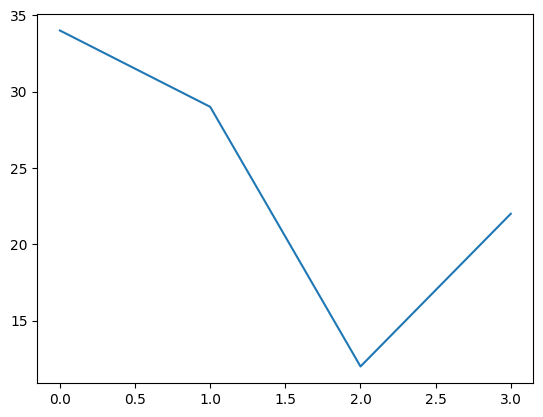

In [166]:
df["Edad"].plot()

## Iteración

In [82]:
# iteración sobre el DataFrame?
frame = pd.DataFrame(diccionario, columns=['Nacionalidad', 'Nombre', 'Edad', 'Profesion'])

for a in frame:
    print(a) # qué es 'a'?
    print(type(a))

Nacionalidad
<class 'str'>
Nombre
<class 'str'>
Edad
<class 'str'>
Profesion
<class 'str'>


In [169]:
# iteracion sobre filas
for value in frame.values:
    print(value)
    print(type(value))

[nan 'Marisa' 34 nan]
<class 'numpy.ndarray'>
[nan 'Laura' 29 nan]
<class 'numpy.ndarray'>
[nan 'Manuel' 12 nan]
<class 'numpy.ndarray'>
[nan 'Paco' 22 nan]
<class 'numpy.ndarray'>


In [170]:
# iterar sobre filas y luego sobre cada valor?
for values in frame.values:
    for value in values: 
        print(value)

nan
Marisa
34
nan
nan
Laura
29
nan
nan
Manuel
12
nan
nan
Paco
22
nan


## Indexación y slicing con DataFrames

In [84]:
d1 = {'ciudad':'Valencia', 'temperatura':10, 'o2':1}
d2 = {'ciudad':'Barcelona', 'temperatura':8}
d3 = {'ciudad':'Valencia', 'temperatura':9}
d4 = {'ciudad':'Madrid', 'temperatura':10, 'humedad':80}
d5 = {'ciudad':'Sevilla', 'temperatura':15, 'humedad':50, 'co2':6}
d6 = {'ciudad':'Valencia', 'temperatura':10, 'humedad':90, 'co2':10}

ls_data = [d1, d2, d3, d4, d5, d6]  # lista de diccionarios
df_data = pd.DataFrame(ls_data, index=list('abcdef'))
display(df_data)

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


In [86]:
# # Acceso a un valor concreto por indice posicional [row, col]
# print(df_data.iloc[1,1])

# # Acceso a todos los valores hasta un índice por enteros
# display(df_data.iloc[:3,:4])

# Acceso a datos de manera explícita, indice semantico (se incluyen)
display(df_data.loc['e', 'temperatura'])
display(df_data.loc[:'c', :'o2'])
display(df_data.loc[:'c', 'temperatura':'o2'])

ls_columnas = ['ciudad', 'temperatura']
col_ind = 'humedad'

display(df_data.loc[:, ls_columnas])

15

,ciudad,temperatura,o2
a,Valencia,10,1.0
b,Barcelona,8,NaN
c,Valencia,9,NaN


,temperatura,o2
a,10,1.0
b,8,NaN
c,9,NaN


,ciudad,temperatura
a,Valencia,10
b,Barcelona,8
c,Valencia,9
d,Madrid,10
e,Sevilla,15
f,Valencia,10


In [195]:
# df_data['temperatura'][0]
# df_data.loc[['a', 'c'], :]
df_data['temperatura']

a    10
b     8
c     9
d    10
e    15
f    10
Name: temperatura, dtype: int64

In [88]:
# indexación con nombre de columna (por columnas)
print(df_data['ciudad']) # --> Series

display(df_data.loc[:, ['ciudad', 'o2']])

a     Valencia
b    Barcelona
c     Valencia
d       Madrid
e      Sevilla
f     Valencia
Name: ciudad, dtype: object


,ciudad,o2
a,Valencia,1.0
b,Barcelona,NaN
c,Valencia,NaN
d,Madrid,NaN
e,Sevilla,NaN
f,Valencia,NaN


In [89]:
# indexación con índice posicional (no permitido!). Esto busca columna.
df_data[0]

KeyError: 0

In [90]:
# indexar por posición con 'iloc'
print(df_data.iloc[0]) # --> Series de la primera fila (qué marca los índices)

ciudad         Valencia
temperatura          10
o2                  1.0
humedad             NaN
co2                 NaN
Name: a, dtype: object


In [91]:
# indexar semántico con 'loc'
df_data.loc['a'] # --> Series de la fila con índice 'a'

ciudad         Valencia
temperatura          10
o2                  1.0
humedad             NaN
co2                 NaN
Name: a, dtype: object

In [92]:
# indexar semántico con 'loc'
df_data.loc[:'b'] # --> DataFrame de la fila con índice 'a'

,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN


In [93]:
type(serie)
serie

Carlos    100
Pedro      12
dtype: int64

In [94]:
# si se modifica una porcion del dataframe se modifica el dataframe original (referencia)
serie = df_data.loc['a']
serie[2] = 3000

display(df_data)

# copiar data frame
# df_2 = df_data.copy()

C:\Users\msi15\AppData\Local\Temp\ipykernel_6328\2763499523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[2] = 3000


,ciudad,temperatura,o2,humedad,co2
a,Valencia,10,1.0,NaN,NaN
b,Barcelona,8,NaN,NaN,NaN
c,Valencia,9,NaN,NaN,NaN
d,Madrid,10,NaN,80.0,NaN
e,Sevilla,15,NaN,50.0,6.0
f,Valencia,10,NaN,90.0,10.0


In [209]:
# ambos aceptan 'axis' como argumento
df_data.iloc(axis=1)[0] # --> todos los valores asignados a la primera columna 'ciudad'
df_data.loc(axis=1)['ciudad'] # --> equivalente frame['ciudad']

a     Valencia
b    Barcelona
c     Valencia
d       Madrid
e      Sevilla
f     Valencia
Name: ciudad, dtype: object

In [95]:
# qué problema puede tener este fragmento?
frame = pd.DataFrame({"Name" : ['Carlos','Pedro'], "Age" : [34,22]}, index=[1,0])
display(frame)

,Name,Age
1,Carlos,34
0,Pedro,22


In [211]:
# por defecto, pandas interpreta índice posicional --> error en frames
# cuando hay posible ambigüedad, utilizar loc y iloc
print('Primera fila\n')
print(frame.iloc[0])
print('\nElemento con index 0\n')
print(frame.loc[0])

Primera fila

Name    Carlos
Age         34
Name: 1, dtype: object

Elemento con index 0

Name    Pedro
Age        22
Name: 0, dtype: object


## Objeto Index de Pandas

In [98]:
# Contrucción de índices
ind = pd.Index([2, 3, 5, 23, 26])
# recuperar datos
print(ind[3])
print(ind[::2])

23
Int64Index([2, 5, 26], dtype='int64')


In [99]:
# usar un objeto index al crear dataframe
frame = pd.DataFrame({"Name" : ['Carlos','Pedro', 'Manolo', 'Luis', 'Alberto'], "Age" : [34,22,15,55,23]}, index=ind)
display(frame)

,Name,Age
2,Carlos,34
3,Pedro,22
5,Manolo,15
23,Luis,55
26,Alberto,23


In [100]:
# Son inmutables! No se modifican los datos. 
ind[3] = 8

TypeError: Index does not support mutable operations

In [102]:
# Definir una columna como indice
frame.set_index(keys=["Name", "Age"], inplace=True)

frame.index
display(frame)

,
Name,Age
Carlos,34
Pedro,22
Manolo,15
Luis,55
Alberto,23


## Slicing

In [104]:
# slice por filas
d_and_d_characters = {'Name' : ['bundenth','theorin','barlok'], 'Strength' : [10,12,19], 'Wisdom' : [20,13,6]}
character_data = pd.DataFrame(d_and_d_characters, index=['a','b','c'])
display(character_data)
display(character_data[:-1])
display(character_data[1:2])

,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13
c,barlok,19,6


,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13


,Name,Strength,Wisdom
b,theorin,12,13


In [105]:
# slicing para columnas
display(character_data[['Name','Wisdom']])

,Name,Wisdom
a,bundenth,20
b,theorin,13
c,barlok,6


In [106]:
#slicing con 'loc' e 'iloc'
display(character_data.iloc[1:])
display(character_data.loc[:'b','Name':'Strength'])

,Name,Strength,Wisdom
b,theorin,12,13
c,barlok,19,6


,Name,Strength
a,bundenth,10
b,theorin,12


¿Cómo filtrar filas y columnas? Por ejemplo, para todos los personajes, obtener 'Name' y 'Strength'

In [107]:
# usando 'loc' para hacer slicing
display(character_data.loc[:,'Name':'Strength'])

,Name,Strength
a,bundenth,10
b,theorin,12
c,barlok,19


In [108]:
# usando 'loc' para buscar específicamente filas y columnas
display(character_data.loc[ ['a','c'], ['Name','Wisdom'] ])

,Name,Wisdom
a,bundenth,20
c,barlok,6


In [109]:
# lo mismo con 'iloc'?
display(character_data.iloc[[0,2],[0,2]])
display(character_data.iloc[[0,-1],[-1]])

,Name,Wisdom
a,bundenth,20
c,barlok,6


,Wisdom
a,20
c,6


In [110]:
character_data['Strength'] > 11
character_data

,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13
c,barlok,19,6


In [112]:
# lista de los personajes con el atributo Strength > 11
display(character_data.loc[character_data['Strength'] > 10, 'Wisdom'])

b    13
c     6
Name: Wisdom, dtype: int64

In [113]:
# listar los personajes con Strength > 15 o Wisdom > 15
display(character_data.loc[(character_data['Strength'] > 5) | (character_data['Wisdom'] > 15)])

,Name,Strength,Wisdom
a,bundenth,10,20
b,theorin,12,13
c,barlok,19,6


In [114]:
# Comprobar si hay nulos
display(pd.isnull(character_data['Strength']))

d_and_d_characters = {'Name' : ['bundenth','theorin','barlok'], 
                      'Strength' : [10,12,19], 'Wisdom' : [20,None,np.nan]}
character_data = pd.DataFrame(d_and_d_characters, index=['a','b','c'])
character_data.head()

display(character_data.loc[pd.isnull(character_data['Wisdom']), :])


a    False
b    False
c    False
Name: Strength, dtype: bool

,Name,Strength,Wisdom
b,theorin,12,NaN
c,barlok,19,NaN


# Cargar y guardar datos en pandas

In [253]:
character_data.reset_index(drop=False, inplace=True)
character_data

,index,Name,Strength,Wisdom
0,a,bundenth,10,20.0
1,b,theorin,12,NaN
2,c,barlok,19,NaN


In [254]:
# Guardar a csv
import os
ruta = os.path.join("res" ,"o_d_d_characters.csv")

character_data.to_csv(ruta, sep=';', index=False) # sep por defecto: ','

In [251]:
loaded = pd.read_csv(ruta, sep=';')
display(loaded)

,Name,Strength,Wisdom
0,bundenth,10,20.0
1,theorin,12,NaN
2,barlok,19,NaN


In [249]:
loaded = pd.read_csv(ruta, sep=';', index_col=0)
display(loaded)

,Name,Strength,Wisdom
indice,,,
a,bundenth,10,20.0
b,theorin,12,NaN
c,barlok,19,NaN


In [ ]:
# Cargar n filas del csv, para ficheros con muchos datos
loaded = pd.read_csv(ruta, sep=';', index_col=0, nrows=1)
display(loaded)

#### otros argumentos to_csv()
- na_rep='string' --> representar valores NaN en el archivo csv

#### otros argumentos read_csv()
- na_values='string'


Pandas también ofrece funciones para leer/guardar a otros formatos estándares: JSON, HDF5 o Excel en su [API](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

# Ejemplo práctico en pandas
- [MovieLens dataset](https://grouplens.org/datasets/movielens/)
 - Reviews de películas
 - 1 millón de entradas
 - Datos demográficos de usuarios

In [122]:
import numpy as np
import pandas as pd
import zipfile # para descomprimir archivos zip
import urllib.request # para descargar de URL
import os

# descargar MovieLens dataset
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'  
ruta = os.path.join("tmp", "ml-1m.zip")
urllib.request.urlretrieve(url, ruta)

FileNotFoundError: [Errno 2] No such file or directory: 'tmp\\ml-1m.zip'

In [123]:
# descomprimiendo archivo zip
ruta_ext = os.path.join("data")
with zipfile.ZipFile(ruta, 'r') as z: 
    print('Extracting all files...') 
    z.extractall(ruta_ext) # destino
    print('Done!') 
    
# take a look at readme y revisar formatos

FileNotFoundError: [Errno 2] No such file or directory: 'tmp\\ml-1m.zip'

In [126]:
import pandas as pd

# Reemplaza 'archivo.dat' con la ruta de tu archivo .dat
ruta_archivo = 'users.dat'

# Especifica el delimitador apropiado, por ejemplo, '\t' para tabulaciones
# Si el archivo .dat usa un espacio en blanco como delimitador, puedes usar ' ' (espacio) en lugar de '\t'
delimitador = '\t'

# Lee el archivo .dat en un DataFrame
users_dataset = pd.read_csv(ruta_archivo, delimiter=delimitador)

# Ahora puedes trabajar con el DataFrame df


In [128]:
# Varios problemas
# sin cabecera! primer valor se ha perdido
# las columnas no tienen nombres
#pd.read_csv?

In [131]:
# especificar nombres, cargar sin cabecera
users_dataset = pd.read_csv(ruta_archivo, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
display(users_dataset)

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [132]:
# samplear la tabla 
display(users_dataset.sample(10))

,Gender,Age,Occupation,Zip-code
UserID,,,,
5804,F,35,7,94306
5625,M,25,1,01760
4986,M,18,12,55401
906,M,1,10,71106
1537,M,18,20,02446
1418,M,18,4,48197
1279,M,35,1,98502
464,F,18,4,55455
4211,M,45,5,77662


In [133]:
# samplear la cabeza
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460


In [134]:
# samplear la cola
display(users_dataset.tail(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060
6040,M,25,6,11106


In [142]:
# tipos de datos sobre las columnas
users_dataset.dtypes

Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [143]:
display(users_dataset[users_dataset['Zip-code'].str.len() > 5])

,Gender,Age,Occupation,Zip-code
UserID,,,,
161,M,45,16,98107-2117
233,F,45,20,37919-4204
293,M,56,1,55337-4056
458,M,50,16,55405-2546
506,M,25,16,55103-1006
...,...,...,...,...
5682,M,18,0,23455-4959
5904,F,45,12,954025
5925,F,25,0,90035-4444


In [144]:
# información general sobre atributos numéricos
display(users_dataset.describe())

,Age,Occupation
count,6040.000000,6040.000000
mean,30.639238,8.146854
std,12.895962,6.329511
min,1.000000,0.000000
25%,25.000000,3.000000
50%,25.000000,7.000000
75%,35.000000,14.000000
max,56.000000,20.000000


In [145]:
users_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 1 to 6040
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      6040 non-null   object
 1   Age         6040 non-null   int64 
 2   Occupation  6040 non-null   int64 
 3   Zip-code    6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


In [146]:
# incluir otros atributos (no todo tiene sentido)
display(users_dataset.describe(include='all'))

,Gender,Age,Occupation,Zip-code
count,6040,6040.000000,6040.000000,6040
unique,2,NaN,NaN,3439
top,M,NaN,NaN,48104
freq,4331,NaN,NaN,19
mean,NaN,30.639238,8.146854,NaN
std,NaN,12.895962,6.329511,NaN
min,NaN,1.000000,0.000000,NaN
25%,NaN,25.000000,3.000000,NaN
50%,NaN,25.000000,7.000000,NaN
75%,NaN,35.000000,14.000000,NaN


In [147]:
# cuántos usuarios son mujeres (Gender='F')
len(users_dataset[users_dataset['Gender'] == 'F'])

# select count(*) from users_dataset where users_dataset.Gender = 'F'

1709

In [156]:
grupos , cont =np.unique(users_dataset['Age'],return_counts=True)
print(grupos, cont)

[ 1 18 25 35 45 50 56] [ 222 1103 2096 1193  550  496  380]


In [157]:
# mostrar solo los menores de edad
under_age2 = users_dataset[users_dataset['Age'] < 18]
print(under_age2)
print(len(under_age))
display(under_age.sample(5))

       Gender  Age  Occupation Zip-code
UserID                                 
1           F    1          10    48067
19          M    1          10    48073
51          F    1          10    10562
75          F    1          10    01748
86          F    1          10    54467
...       ...  ...         ...      ...
5844        F    1          10    02131
5953        M    1          10    21030
5973        M    1          10    54701
5989        F    1          10    74114
6006        F    1           0    01036

[222 rows x 4 columns]
222


,Gender,Age,Occupation,Zip-code
UserID,,,,
2047,M,1,10,06437
4807,M,1,2,04101
1280,M,1,10,97801
1241,M,1,10,11803
5662,M,1,10,07960


In [158]:
# filtrar edad incorrecta (míninimo 18) SettingWithCopyWarning!!!
users_dataset = pd.read_csv(ruta_archivo, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
under_age = users_dataset[users_dataset['Age'] == 1]

under_age.loc['Age'] = np.nan
# display(under_age.head())

users_dataset[users_dataset['Age'] < 18] = under_age
display(users_dataset.head())

C:\Users\msi15\AppData\Local\Temp\ipykernel_6328\2675714645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_age.loc['Age'] = np.nan


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [162]:
users_dataset[users_dataset['Age'] < 18]
users_dataset.shape

(6040, 4)

In [ ]:
# filtrar edad incorrecta (míninimo 18) Fixing it by Copying the slice
users_dataset = pd.read_csv(ruta_users, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')
under_age = users_dataset[users_dataset['Age'] == 1]

under_age_copy = under_age.copy()
under_age_copy['Age'] = np.nan
display(under_age_copy.head())

users_dataset[users_dataset['Age'] < 18] = under_age_copy
display(users_dataset.head())

In [163]:
# filtrar edad incorrecta (míninimo 18) Remove them from the dataset
users_dataset = pd.read_csv(ruta_archivo, sep='::', index_col=0,
    header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')

display(users_dataset[users_dataset['Age'] == 1].head(4))

# asignación o cambio directo con loc
users_dataset.loc[users_dataset['Age'] == 1,'Age'] = np.nan
display(users_dataset.loc[pd.isnull(users_dataset['Age'])].head(4))

# eliminamos las filas con nulos
users_dataset.drop(users_dataset[pd.isnull(users_dataset['Age'])].index, inplace = True)
display(users_dataset.head(4))

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
19,M,1,10,48073
51,F,1,10,10562
75,F,1,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,NaN,10,48067
19,M,NaN,10,48073
51,F,NaN,10,10562
75,F,NaN,10,01748


,Gender,Age,Occupation,Zip-code
UserID,,,,
2,M,56.0,16,70072
3,M,25.0,15,55117
4,M,45.0,7,02460
5,M,25.0,20,55455


In [165]:
# Agrupar datos por atributos
display(users_dataset.groupby('Gender').agg(['sum', 'count', 'min', 'max']))

Age                   Occupation                \
             sum count   min   max        sum count min max   
Gender                                                        
F        52661.0  1631  18.0  56.0      10599  1631   0  20   
M       132178.0  4187  18.0  56.0      36608  4187   0  20   

                                                 Zip-code                      
                                                      sum count    min    max  
Gender                                                                         
F       5511795370040932067095825100231460719143193550...  1631  00231  99801  
M       7007255117024605545506810114136161432793933046...  4187  00606  99945

In [ ]:
# Grabar la tabla modificada
# Cambiar el separador a ','
# Guardar NaN como 'null'
ruta_output = os.path.join('res', 'ml-1m', 'o_users_processed.csv')
users_dataset.to_csv(ruta_output, sep=',',na_rep='null')

# Ejercicios
- Hacer un análisis general de los otros dos archivos CSV en ml-1m ('movies.dat' y 'ratings.dat')
- Analizando el dataset ratings.dat, ¿hay algún usuario que no tenga ninguna review? ¿Cuántos tienen menos de 30 reviews?
- Ejercicios prácticos: https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb